In [4]:
#Project- Part A: Airbnb Price Prediction and Insights

In [8]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression 
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

In [9]:
df = pd.read_csv('Airbnb_data - airbnb_data.csv')

In [10]:
df.head()

,id,log_price,property_type,room_type,amenities,accommodates,bathrooms,bed_type,cancellation_policy,cleaning_fee,...,latitude,longitude,name,neighbourhood,number_of_reviews,review_scores_rating,thumbnail_url,zipcode,bedrooms,beds
0,6901257,5.010635,Apartment,Entire home/apt,"{""Wireless Internet"",""Air conditioning"",Kitche...",3,1.0,Real Bed,strict,True,...,40.696524,-73.991617,Beautiful brownstone 1-bedroom,Brooklyn Heights,2,100.0,https://a0.muscache.com/im/pictures/6d7cbbf7-c...,11201,1.0,1.0
1,6304928,5.129899,Apartment,Entire home/apt,"{""Wireless Internet"",""Air conditioning"",Kitche...",7,1.0,Real Bed,strict,True,...,40.766115,-73.989040,Superb 3BR Apt Located Near Times Square,Hell's Kitchen,6,93.0,https://a0.muscache.com/im/pictures/348a55fe-4...,10019,3.0,3.0
2,7919400,4.976734,Apartment,Entire home/apt,"{TV,""Cable TV"",""Wireless Internet"",""Air condit...",5,1.0,Real Bed,moderate,True,...,40.808110,-73.943756,The Garden Oasis,Harlem,10,92.0,https://a0.muscache.com/im/pictures/6fae5362-9...,10027,1.0,3.0
3,13418779,6.620073,House,Entire home/apt,"{TV,""Cable TV"",Internet,""Wireless Internet"",Ki...",4,1.0,Real Bed,flexible,True,...,37.772004,-122.431619,Beautiful Flat in the Heart of SF!,Lower Haight,0,NaN,https://a0.muscache.com/im/pictures/72208dad-9...,94117,2.0,2.0
4,3808709,4.744932,Apartment,Entire home/apt,"{TV,Internet,""Wireless Internet"",""Air conditio...",2,1.0,Real Bed,moderate,True,...,38.925627,-77.034596,Great studio in midtown DC,Columbia Heights,4,40.0,NaN,20009,0.0,1.0


In [11]:
# Task 1 : Data Exploration and Preprocessing

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74111 entries, 0 to 74110
Data columns (total 29 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      74111 non-null  int64  
 1   log_price               74111 non-null  float64
 2   property_type           74111 non-null  object 
 3   room_type               74111 non-null  object 
 4   amenities               74111 non-null  object 
 5   accommodates            74111 non-null  int64  
 6   bathrooms               73911 non-null  float64
 7   bed_type                74111 non-null  object 
 8   cancellation_policy     74111 non-null  object 
 9   cleaning_fee            74111 non-null  bool   
 10  city                    74111 non-null  object 
 11  description             74111 non-null  object 
 12  first_review            58247 non-null  object 
 13  host_has_profile_pic    73923 non-null  object 
 14  host_identity_verified  73923 non-null

In [13]:
df.describe()

,id,log_price,accommodates,bathrooms,latitude,longitude,number_of_reviews,review_scores_rating,bedrooms,beds
count,7.411100e+04,74111.000000,74111.000000,73911.000000,74111.000000,74111.000000,74111.000000,57389.000000,74020.000000,73980.000000
mean,1.126662e+07,4.782069,3.155146,1.235263,38.445958,-92.397525,20.900568,94.067365,1.265793,1.710868
std,6.081735e+06,0.717394,2.153589,0.582044,3.080167,21.705322,37.828641,7.836556,0.852143,1.254142
min,3.440000e+02,0.000000,1.000000,0.000000,33.338905,-122.511500,0.000000,20.000000,0.000000,0.000000
25%,6.261964e+06,4.317488,2.000000,1.000000,34.127908,-118.342374,1.000000,92.000000,1.000000,1.000000
50%,1.225415e+07,4.709530,2.000000,1.000000,40.662138,-76.996965,6.000000,96.000000,1.000000,1.000000
75%,1.640226e+07,5.220356,4.000000,1.000000,40.746096,-73.954660,23.000000,100.000000,1.000000,2.000000
max,2.123090e+07,7.600402,16.000000,8.000000,42.390437,-70.985047,605.000000,100.000000,10.000000,18.000000


In [14]:
missing_values = df.isnull().sum() #checking for the missign values count

In [15]:
missing_values

id                            0
log_price                     0
property_type                 0
room_type                     0
amenities                     0
accommodates                  0
bathrooms                   200
bed_type                      0
cancellation_policy           0
cleaning_fee                  0
city                          0
description                   0
first_review              15864
host_has_profile_pic        188
host_identity_verified      188
host_response_rate        18299
host_since                  188
instant_bookable              0
last_review               15827
latitude                      0
longitude                     0
name                          0
neighbourhood              6872
number_of_reviews             0
review_scores_rating      16722
thumbnail_url              8216
zipcode                     968
bedrooms                     91
beds                        131
dtype: int64

In [16]:
#I can see there so many missing values in both catagorical and numerical columns.

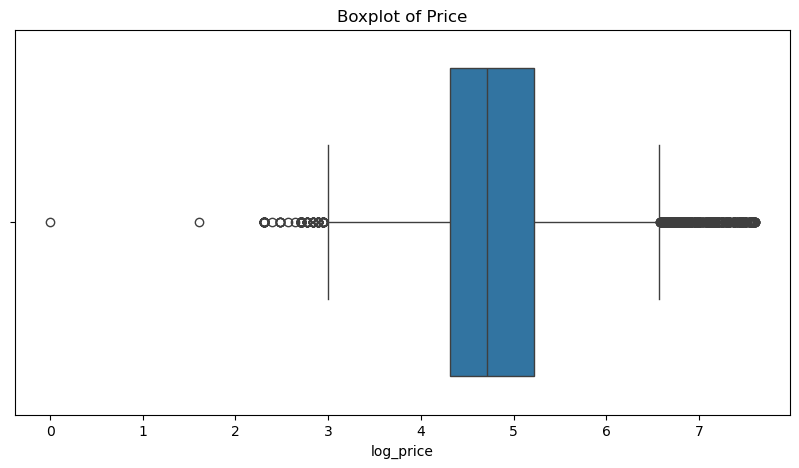

In [17]:
#Detecting outliers from the log_price column
if 'log_price' in df.columns:
    plt.figure(figsize=(10,5))
    sns.boxplot(x=df['log_price'])
    plt.title('Boxplot of Price')
    plt.show()

In [18]:
# filing categorical columns with the most frequent value from a column i.e mode value
cat_cols = df.select_dtypes(include=['object']).columns       
df[cat_cols] = df[cat_cols].fillna(df[cat_cols].mode().iloc[0])

In [19]:
df.isnull().sum()

id                            0
log_price                     0
property_type                 0
room_type                     0
amenities                     0
accommodates                  0
bathrooms                   200
bed_type                      0
cancellation_policy           0
cleaning_fee                  0
city                          0
description                   0
first_review                  0
host_has_profile_pic          0
host_identity_verified        0
host_response_rate            0
host_since                    0
instant_bookable              0
last_review                   0
latitude                      0
longitude                     0
name                          0
neighbourhood                 0
number_of_reviews             0
review_scores_rating      16722
thumbnail_url                 0
zipcode                       0
bedrooms                     91
beds                        131
dtype: int64

In [20]:
# filing numerical columns with median value for empty cells
num_cols = df.select_dtypes(include=[np.number]).columns
df[num_cols] = df[num_cols].fillna(df[num_cols].median())

In [21]:
df.isnull().sum()

id                        0
log_price                 0
property_type             0
room_type                 0
amenities                 0
accommodates              0
bathrooms                 0
bed_type                  0
cancellation_policy       0
cleaning_fee              0
city                      0
description               0
first_review              0
host_has_profile_pic      0
host_identity_verified    0
host_response_rate        0
host_since                0
instant_bookable          0
last_review               0
latitude                  0
longitude                 0
name                      0
neighbourhood             0
number_of_reviews         0
review_scores_rating      0
thumbnail_url             0
zipcode                   0
bedrooms                  0
beds                      0
dtype: int64

In [22]:
df = df.drop_duplicates()  # Removing duplicates from columns

In [23]:
#Extract date parts
if 'first_review' in df.columns:
    df['first_review_date'] = pd.to_datetime(df['first_review'],dayfirst=True)
    df['first_review_year'] = df['first_review_date'].dt.year
    df['first_review_month'] = df['first_review_date'].dt.month

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74111 entries, 0 to 74110
Data columns (total 32 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   id                      74111 non-null  int64         
 1   log_price               74111 non-null  float64       
 2   property_type           74111 non-null  object        
 3   room_type               74111 non-null  object        
 4   amenities               74111 non-null  object        
 5   accommodates            74111 non-null  int64         
 6   bathrooms               74111 non-null  float64       
 7   bed_type                74111 non-null  object        
 8   cancellation_policy     74111 non-null  object        
 9   cleaning_fee            74111 non-null  bool          
 10  city                    74111 non-null  object        
 11  description             74111 non-null  object        
 12  first_review            74111 non-null  object

In [25]:
# Creating new feature price_per_guest
if 'log_price' in df.columns and 'accommodates' in df.columns:
    df['price_per_guest'] = df['log_price'] / df['accommodates']

In [26]:
# Tas 2 : Model Development 

In [27]:
# took categorical features and numerical features saperately that affects the price of Airbnb
cat_cols = ['property_type','room_type','city','bed_type','cancellation_policy']
num_cols = ['accommodates', 'bedrooms','beds','number_of_reviews']

df_encoded = pd.get_dummies(df, columns=cat_cols, drop_first=True)

dummy_cols = [col for col in df_encoded.columns if any(col.startswith(f"{cat}_") for cat in cat_cols)]

my_final_features = num_cols + dummy_cols

X = df_encoded[my_final_features]

y = df_encoded['log_price']

print("Final X shape:", X.shape)

#train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Train shape:", X_train.shape)
print("Test shape:", X_test.shape)

#Creating and training model
model = LinearRegression()
model.fit(X_train, y_train)

Final X shape: (74111, 53)
Train shape: (59288, 53)
Test shape: (14823, 53)


LinearRegression()

In [28]:
#Task 3 : Model Evaluation 

RMSE: 0.48406625995327657
MAE: 0.36669023905105225
R^2: 0.5438809982564574


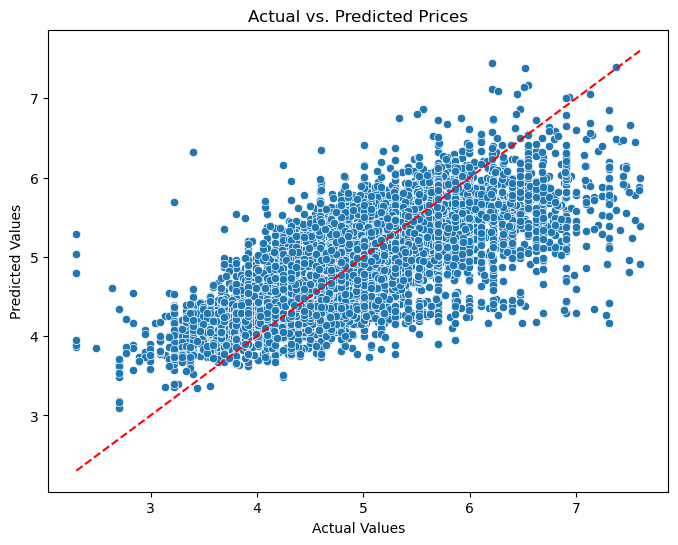

In [30]:
#Already build the model now evaluating the performance of a model using RMSE, MAE and R2

y_pred = model.predict(X_test)
# Root Mean Squared Error
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("RMSE:", rmse)

# Mean Absolute Error
mae = mean_absolute_error(y_test, y_pred)
print("MAE:", mae)

# R-squared
r2 = r2_score(y_test, y_pred)
print("R^2:", r2)

#Visualiazing predicted with actual values
plt.figure(figsize=(8,6))
sns.scatterplot(x=y_test, y=y_pred)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs. Predicted Prices")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.show()

In [3]:
#Overall insights and findings from Airbnb price prediction project 

In [ ]:
'''
The dataset contained several missing values in columns such as bedrooms, beds, and some categorical fields.
These were handled using appropriate imputation strategies e.g. filling missing values with mode or median,removing duplicates.
Detected outliers using boxplot resulting highly skewed at the right side. Focused on both categorical and numerical features and 
Only selected categorical columns were encoded to avoid unnecessary model noise. A Linear Regression model was trained to predict log_price.
Evaluation was done using standard regression metrics using R2Score-showed how well the model explained the variance in price and RMSE/MAE -
indicated the typical prediction error in log price. Selective use of categorical variables improved model interpretability and reduced overfitting.
'''

In [5]:
#Part B: Customer Churn Prediction

In [25]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.ensemble import RandomForestClassifier

In [8]:
df = pd.read_csv('Customer_data - customer_data.csv')

In [16]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [2]:
#Task 1 : A data exploration and preprocessing notebook or report that analyzes the dataset, handles missing values, and prepares the data for modeling. 

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [12]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7032.000000
mean,0.162147,32.371149,64.761692,2283.300441
std,0.368612,24.559481,30.090047,2266.771362
min,0.000000,0.000000,18.250000,18.800000
25%,0.000000,9.000000,35.500000,401.450000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.850000,3794.737500
max,1.000000,72.000000,118.750000,8684.800000


In [15]:
df.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

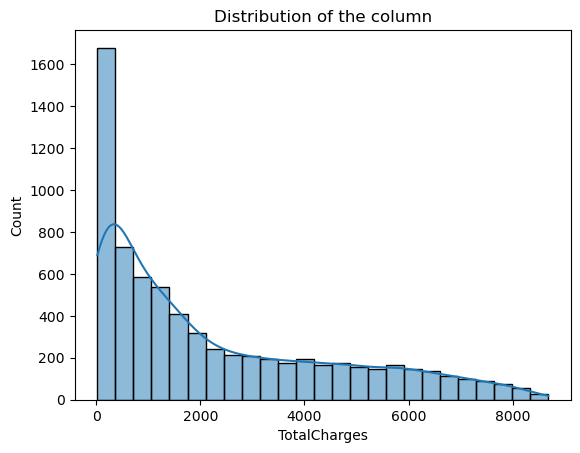

In [17]:
sns.histplot(df['TotalCharges'], kde=True)
plt.title('Distribution of the column')
plt.show()

In [20]:
#I can see from the plot, the data is right-skewed. So filling it with median value will be the best fit so that it will not 
#affected by outliers
df['TotalCharges'] = df['TotalCharges'].fillna(df['TotalCharges'].median())

In [19]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [22]:
print("Duplicate rows:", df.duplicated().sum())
df = df.drop_duplicates()

Duplicate rows: 0


In [23]:
#Task 2 : A machine learning model capable of predicting customer churn.

In [24]:
df['Churn'] = df['Churn'].map({'Yes': 1, 'No': 0})

In [30]:
cat_cols = ['gender','Partner', 'Dependents', 'InternetService','PhoneService','Contract','OnlineSecurity']

df_encoded = pd.get_dummies(df, columns=cat_cols, drop_first=True)

features = ['tenure', 'SeniorCitizen'] + [
    col for col in df_encoded.columns 
    if col.startswith(tuple(cat_cols)) and col != 'Churn'
]
X = df_encoded[features]
y = df_encoded['Churn']

print("Final X shape:", X.shape)

#train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

Final X shape: (7043, 12)


RandomForestClassifier(random_state=42)

In [33]:
#Task 3: An evaluation of model performance using appropriate metrics (such as accuracy, precision, recall, F1 score, etc.).

Accuracy: 0.7629524485450674

Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.84      0.84      1035
           1       0.55      0.54      0.55       374

    accuracy                           0.76      1409
   macro avg       0.70      0.69      0.69      1409
weighted avg       0.76      0.76      0.76      1409



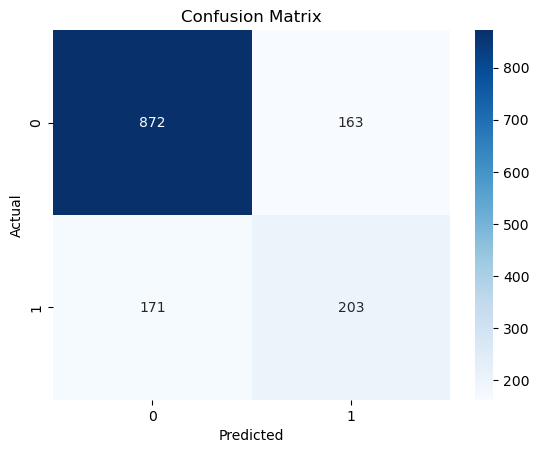

In [32]:
y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [34]:
#Overall insights and findings from Airbnb price prediction project 

In [ ]:
'''
The dataset contains a numerical column having missing values which handled appropriately using median value. 
From the Confusion Matrix Findings it is seen that the dataset had significantly more non-churners, which impacted performance on minority.
From the classification report we can compute performance metrics from these values such as Accuracy-How often is the model correct?
model predicted correctly for 76.3% of the total 1409 customers. For Class 0(non-churn) Precision - 84% of customers predicted as 
non-churn were truly non-churn. Recall - 84% of actual non-churn customers were correctly identified. F1Score -good balance between 
precision and recall. Class 1 (Churn): Precision - Only 55% of customers predicted as churn actually churned. Recall - 
Model correctly identified 54% of all actual churners.F1Score - Moderate performance.
'''